In [48]:
!pip install wquantiles

In [17]:
!pip install pgmpy

     ---------------------------------------- 1.9/1.9 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00


In [32]:
!pip install pandas-datareader==0.5.0

     ---------------------------------------- 74.1/74.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for requests-ftp: filename=requests_ftp-0.3.1-py3-none-any.whl size=8190 sha256=7ac67da2174cdcedfb507eaf682e3da572069165b61c72f91c2ab2728dcc6cd0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1f\ca\c8\8104efe372457bf1e88dd70fa641c8043afe6c769bce1433c3
Successfully built requests-ftp
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.10.0
    Uninstalling pandas-datareader-0.10.0:
      Successfully uninstalled pandas-datareader-0.10.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import wquantiles
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import pgmpy
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\LGhv_practice\\ETL'

In [3]:
import platform
from matplotlib import font_manager, rc

#그래프 - 한글 사용 설정
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
#그래프 - 음수 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [4]:
file_path = 'C:/Users/USER/Documents/LGhv_practice/resource/stat/data/'

# 기술 통계

In [4]:
df = pd.read_csv(file_path + 'descriptive.csv')
df.info()

,resident,gender,age,level,cost,type,survey,pass
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0


## 명목 척도

In [ ]:
#성별 인원 수 확인
print(df['gender'].value_counts()) #인원수
# 0과 5라는 이상치 존재
#이상치가 존재하면 category 형의 데이터 에서는 제거하는 경우가 많고 
#양을 나타내는 경우는 정규화나 표준화를 이용해서 숫자의 범위를 조정하는 경우도 있음

df_gender = df[(df.gender == 1) | (df.gender == 2)]
df_gender.gender.value_counts()
#성별 비율을 시각화 - 막대 나 파이 차트를 이용해서 시각화
df_gender['gender'].value_counts().plot.bar(color = 'k', alpha = 0.7)

## 순서 척도

<Axes: >

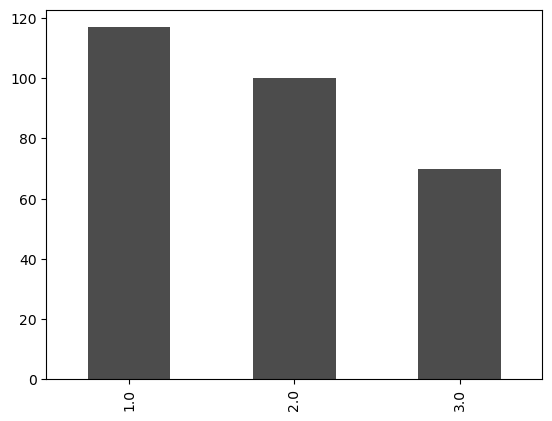

In [10]:
#순서 척도: 구분을 하고 순서를 정하기 위해서 만들어진 수치 데이터
#이 경우도 구성 비율 정도가 의미를 가짐
df['level'].value_counts() #이상치 존재 X
df['level'].value_counts().plot.bar(color = 'k', alpha = 0.7)

## 등간 척도

<Axes: ylabel='survey'>

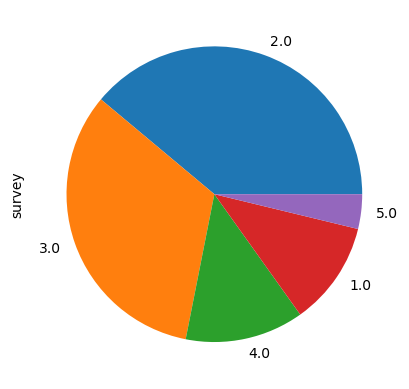

In [12]:
#survey는 등간 척도 -> 요약 통계량과 구성 비율도 의미를 갖음
df['survey'].describe()
df_gender['survey'].value_counts().plot.pie()

## 비율 척도

In [16]:
#비율 척도 - 응답자가 직접 수치로 입력한 변수로 기준점이 존재하는 수치 데이터라서 사칙 연산이 가능한 척도
#빈도 분석(구성 비율) 과 기술 통계량 모두가 의미를 갖지만 빈도 분석의 경우는 구간화를 해야할 수도 있음
#cost - 비율 척도
df['cost'].describe()
#값의 종류가 너무 많음
#비율 척도가 직접 입력하는 형태가 되므로 이상치나 결측치의 발생 가능성이 높음
#UI를 만들 때 다른 척도에 비해서 주의 를 기울여야 함
df['cost'].value_counts()
#값의 범위가 너무 넓음


count    271.000000
mean       8.722878
std       68.970799
min     -457.200000
25%        4.400000
50%        5.400000
75%        6.300000
max      675.000000
Name: cost, dtype: float64

In [20]:
#일반 적인 생활비 -> 2 ~ 10
cost = df['cost']
cost[(cost >= 2) | (cost <= 10)].describe()
#cost[(cost >= 2) | (cost <= 10)].value_counts()

count    251.000000
mean       5.360558
std        1.137435
min        2.100000
25%        4.600000
50%        5.400000
75%        6.200000
max        7.900000
Name: cost, dtype: float64

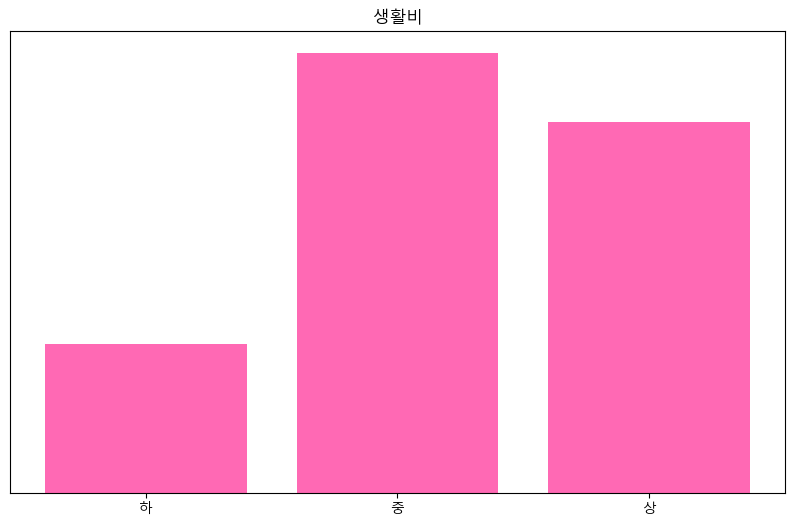

In [34]:
#cost의 빈도 분석을 위해서 3 구간으로 분할해서 시각화
#시각화 영역 크기 설정
plt.figure(figsize = (10,6))
ys, xs, patches = plt.hist(cost[(cost >= 2) & (cost <= 10)],
                          bins = 3, #구간의 개수
                          density = True, #백분율 설정
                          cumulative = False, #누적 여부,
                          histtype = 'bar', #graph의 모양, step / bar
                          orientation = 'vertical', #방향
                          rwidth = 0.8,
                          color = 'hotpink')

#remove y-axis label
plt.yticks([])
#add x-axis label
plt.xticks([(xs[i] + xs[i+1]) / 2 for i in range(0, len(xs)-1)], ['하', '중', '상'])

plt.title('생활비')
plt.show()

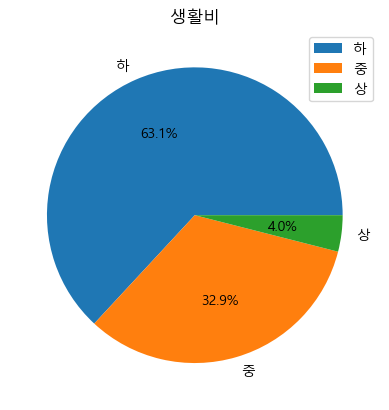

In [38]:
cost = df['cost']
cost= cost[(cost >=1) & (cost <= 10)]
#직접 구간화 작업 수행
cost[(cost >= 1) & (cost <= 3)] = 1
cost[(cost > 3) & (cost <= 6)] = 2
cost[(cost > 6) & (cost <= 10)] = 3

cost = cost.astype(int)

plt.pie(cost.value_counts(), labels = ['하','중','상'], autopct = '%1.1f%%')
plt.title('생활비')
plt.legend()
plt.show()

# data 특성

## 평균

In [43]:
s = pd.Series([10,11,10.78])

#산술 평균
print('평균 성장률:', s.pct_change().mean()) 
print(10 * 1.040000000000000036 * 1.040000000000000036)

#기하 평균
print('기하 평균:', math.sqrt(11/10) * (10.78 / 11))
print(10 * 1.0278326712067485 * 1.0278326712067485)

평균 성장률: 0.040000000000000036
10.816
기하 평균: 1.0278326712067485
10.564400000000001


In [45]:
#절사 평균을 구하기 위해서 import
from scipy import stats

tdata = pd.read_csv(file_path+'tdata.csv', encoding = 'cp949')
#print(tdata)
print('mean: ', tdata['성적'].mean())
print('median: ', tdata['성적'].median())
#상위 0.05와 하위 0.05에 해당하는 데이터를 제거하고 평균 구하기
print('trimmedmean: ', stats.trim_mean(tdata['성적'], 0.1))


mean:  77.1
median:  77.5
trimmedmean:  77.0


In [52]:
#각 주의 이름과 약자 그리고 인구 그리고 살인 사건 발생률 데이터
#population은 이구, Murder.Rate는 살인 사건 발생률
#Murder.Rate의 평균을 바로 구하는 것은 인구에 대한 가중치를 부여하지 않았기 때문에 
#결과가 왜곡 될 수 있음
state = pd.read_csv(file_path+'state.csv')
state.head()

print('mean: ', state['Murder.Rate'].mean())
print('median: ', state['Murder.Rate'].median())

#가중 중앙값 , 가중 평균값 구하기

print('mean w/ weight: ', np.average(state['Murder.Rate'], weights = state['Population']))
print('median w/ weight: ', wquantiles.median(state['Murder.Rate'], weights = state['Population']))

mean:  4.066
median:  4.0
mean w/ weight:  4.445833981123393
median w/ weight:  4.4


# 데이터 분포 탐색

## 4분위 수, 10분위 수 , 100분위 수 등을 이용

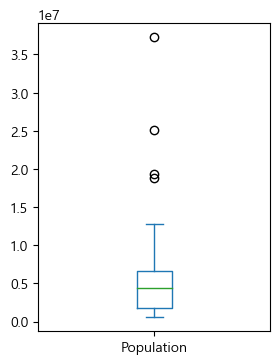

In [54]:
#4분위 수 와 백분위 수 확인
state = pd.read_csv(file_path+'state.csv')
state['Murder.Rate'].quantile([0.05,0.25,0.50,0.75,0.95])

#녹색 선이 50% 상자의 양 끝선이 25%, 75%에 해당하는 값
#수염의 끝은 하위 25%에서 (75% - 25% * 1.5)를 뺀 값
#상위 75%에서 
#가장 일반적인 이상치 검사 방법이 수염 외부에 있는 값을 이상치로 간주하는 것
ax = (state['Population'].plot.box(figsize = (3,4)))
plt.show()

## 도수 분포표

In [72]:
#population을 10개의 그룹으로 분할 한 후 개수 구하기
binnedPopulation = pd.cut(state['Population'], 10)
#그룹 별로 데이터의 개수를 가지고 정렬해서 출력
binnedPopulation.value_counts()
#각 구간에 속한 주 이름을 같이 출력
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis =1)
df

#population 순으로 data 정렬
df = df.sort_values(by = 'Population')
df

groups = []
#인구의 하한과 상한으로 그룹화를 해서 field 생성
for group, subset in df.groupby(by = 'binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': '.'.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,WY.VT.ND.AK.SD.DE.MT.RI.NH.ME.HI.ID.NE.WV.NM.N...
1,"(4232659.0, 7901692.0]",14,KY.LA.SC.AL.CO.MN.WI.MD.MO.TN.AZ.IN.MA.WA
2,"(7901692.0, 11570725.0]",6,VA.NJ.NC.GA.MI.OH
3,"(11570725.0, 15239758.0]",2,PA.IL
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


##  상대 도수 & 누적 도수

In [91]:
#상대 도수와 누적 도수 출력
scores = pd.read_csv(file_path+'scores_em.csv', index_col = 'student number')
scores

#영어 점수 꺼내기
english_scores = np.array(scores['english'])
#0~100까지를 10개의 구간으로 나누어서 개수 파악
freq, _ = np.histogram(english_scores, bins =10, range =(0,100))
freq

#0~10, 10 ~20  형태의 문자열 만들기
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

#문자열과 데이터 개수를 가지고 DataFrame 만들기
freq_dist_df = pd.DataFrame({'빈도 수': freq}, index = pd.Index(freq_class, name = '구간'))
freq_dist_df

#상대 도수 만들기 
rel_freq = freq / freq.sum()
rel_freq

#누적 상대 도수 만들기 
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

freq_dist_df['상대 도수'] = rel_freq
freq_dist_df['누적 상대 도수'] = cum_rel_freq
freq_dist_df

,빈도 수,상대 도수,누적 상대 도수
구간,,,
0~10,0,0.00,0.00
10~20,0,0.00,0.00
20~30,0,0.00,0.00
30~40,2,0.04,0.04
40~50,8,0.16,0.20
50~60,16,0.32,0.52
60~70,18,0.36,0.88
70~80,6,0.12,1.00
80~90,0,0.00,1.00


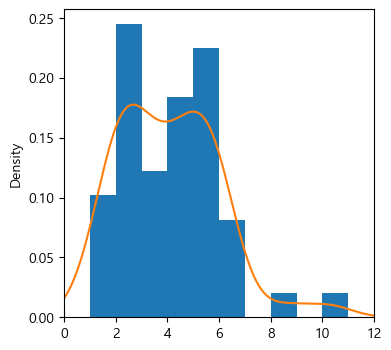

In [93]:
#histogram
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1, 12), figsize =(4,4))

#밀도 추정 - histogram 보다 부드럽게 곡선으로 데이터의 분포를 시각화
state['Murder.Rate'].plot.density(ax = ax)
plt.show()

## 교차 분석, Cross Table Analysis

In [102]:
#교차 분석
university = pd.read_csv(file_path+'descriptive.csv')
university

#cost 열 제거
university.drop('cost', axis = 1, inplace = True)
university.head()

#gender 대신에 남자 여자로 변경한 컬럼 추가
university['성별'] = '남자'
idx = 0
for val in university.gender:
    if val == 2:
        university['성별'][idx] = '여자'
    idx += 1
    
university.drop('gender', axis = 1, inplace = True)
university.head()

university['학력'] = '응답 없음'
idx = 0
for val in university['level']:
    if val == 1.0:
        university['학력'][idx] = '고졸'
    elif val == 2.0:
        university['학력'][idx] = '대졸'
    elif val == 3.0:
        university['학력'][idx] = '대학원졸'
    idx += 1
university.drop('level', axis = 1, inplace = True)
university.head()

university['합격여부'] = '응답 없음'
idx = 0
for val in university['pass']:
    if val == 1.0:
        university['합격여부'][idx] = '합격'
    elif val == 2.0:
        university['합격여부'][idx] = '불합격'
    idx += 1
university.drop('pass', axis = 1, inplace = True)
university.head()

#응답 없음 제거
university = university[(university['학력'] == '고졸') |
                        (university['학력'] == '대졸')|
                        (university['학력'] == '대학원졸')]

#학력과 성별에 대한 교차 분할표
pd.crosstab(university['학력'], university['성별'])

성별,남자,여자
학력,,
고졸,67,50
대졸,60,40
대학원졸,42,28


## 상관 계수

In [103]:
mpg = pd.read_csv(file_path+'auto-mpg.csv', header = None)
mpg.columns = ['mpg', 'cylinders','displacemenet','horsepower','weight', 'acceleration',
              'model year','origin','name']
mpg.head()

#모든 컬럼에 대한 산점도 그리기
sns.plt

,mpg,cylinders,displacemenet,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [104]:
#모든 숫자 컬럼의 상관 계수 확인
mpg.corr()

#이 경우 mpg에 대한 회귀 분석을 할 때는 차원 축소나 제거를 고려
#cylinders와 displacement가 상관 계수가 높아서 아주 강한 상관 관계를 가지고 있음
#상관 관계를 가지고 있는 feature들을 이용해서 분석을 하게 되면
#다중 공산성 문제가 불거지게 됨

,mpg,cylinders,displacemenet,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacemenet,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


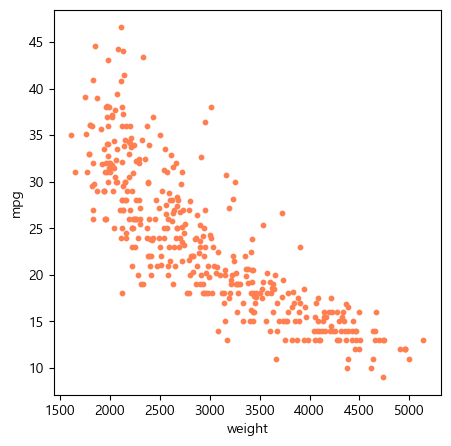

In [106]:
mpg.plot(kind ='scatter', x = 'weight', y = 'mpg', c = 'coral', s= 10, figsize = (5,5))
plt.show()

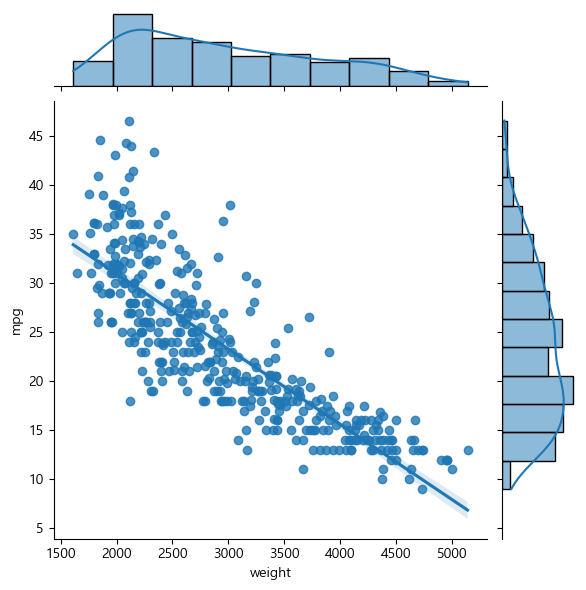

In [109]:
#회귀선과 분포를 함께 확인
#sns.regplot(x = 'weight', y = 'mpg', data = mpg)
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = mpg)

In [114]:
#모든 숫자 컬럼의 상관 계수 확인
mpg.corr()
#모든 숫자 컬러므이 상관 계수를 구하는데 horsepower는 나오지 않음
#이런 경우 자료형 확인 - horsepower가 object 타입
#mpg.info()

#mpg['horsepower'].value_counts()
#mpg.horsepower.unique()

mpg.horsepower.replace('?', np.nan, inplace = True)
mpg.dropna(subset = ['horsepower'], axis = 0, inplace = True)
mpg.horsepower = mpg.horsepower.astype('float')

mpg.corr()

,mpg,cylinders,displacemenet,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacemenet,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [116]:
#유의 확률: 우연히 이렇게 나올 확룔
#이 확률이 낮으면 신뢰할 수 있는 값
#일반적으로 사용하는 값은 0.1,0.05, 0.01

result = sp.stats.pearsonr(mpg['mpg'].values,mpg.horsepower.values)
result
# PearsonRResult(statistic=-0.7784267838977761, pvalue=7.031989029404151e-81)
#유의 확률이 0.01보다 현저하게 적음 -> 신뢰할 만함

PearsonRResult(statistic=-0.7784267838977761, pvalue=7.031989029404151e-81)

## anscombe data

In [121]:
data = sm.datasets.get_rdataset('anscombe')
df = data.data
#data 확인
#print(df)

#4개의 상관 계수 가 동일
print(df[['x1','y1']].corr())
print(df[['x2','y2']].corr())
print(df[['x3','y3']].corr())
print(df[['x4','y4']].corr())

result = sp.stats.pearsonr(df['x1'].values, df['y1'].values)
print(result)
result = sp.stats.pearsonr(df['x2'].values, df['y2'].values)
print(result)
result = sp.stats.pearsonr(df['x3'].values, df['y3'].values)
print(result)
result = sp.stats.pearsonr(df['x4'].values, df['y4'].values)
print(result)

          x1        y1
x1  1.000000  0.816421
y1  0.816421  1.000000
          x2        y2
x2  1.000000  0.816237
y2  0.816237  1.000000
          x3        y3
x3  1.000000  0.816287
y3  0.816287  1.000000
          x4        y4
x4  1.000000  0.816521
y4  0.816521  1.000000
PearsonRResult(statistic=0.8164205163448399, pvalue=0.0021696288730787927)
PearsonRResult(statistic=0.8162365060002427, pvalue=0.0021788162369108027)
PearsonRResult(statistic=0.8162867394895982, pvalue=0.002176305279228025)
PearsonRResult(statistic=0.8165214368885029, pvalue=0.002164602347197218)


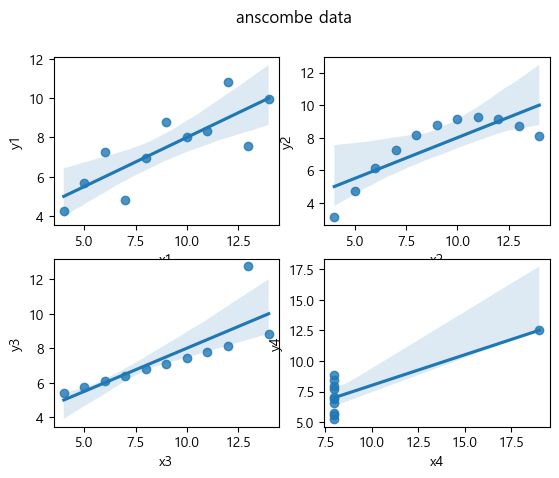

In [123]:
plt.subplot(221)
sns.regplot(x = 'x1',y= 'y1', data = df)
plt.subplot(222)
sns.regplot(x = 'x2',y= 'y2', data = df)
plt.subplot(223)
sns.regplot(x = 'x3',y= 'y3', data = df)
plt.subplot(224)
sns.regplot(x = 'x4',y= 'y4', data = df)
plt.suptitle('anscombe data')
plt.show()

## Spearman's Rank Corr-Coef

In [127]:
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series([1,8,27,64,125,216])

p1 = pd.Series([1,2,3,4,5,6])
p2 = pd.Series([1,1,2,3,5,8])
print('pearson corr-coef: ', s1.corr(s2))
print('pearson corr-coef: ', p1.corr(p2))
print('pearson corr-coef: ', sp.stats.pearsonr(s1,s2))

print('kendal corr-coef: ', s1.corr(s2, method = 'kendall'))
print('kendal corr-coef: ',sp.stats.kendalltau(s1,s2))

print('spearman corr-coef: ', s1.corr(s2, method = 'spearman'))
print('spearman corr-coef: ', p1.corr(p2, method = 'spearman'))
print('spearman corr-coef: ', sp.stats.spearmanr(s1,s2))

pearson corr-coef:  0.9379313244517968
pearson corr-coef:  0.9389529557231421
pearson corr-coef:  PearsonRResult(statistic=0.9379313244517968, pvalue=0.005659220304470507)
kendal corr-coef:  0.9999999999999999
kendal corr-coef:  SignificanceResult(statistic=0.9999999999999999, pvalue=0.002777777777777778)
spearman corr-coef:  1.0
spearman corr-coef:  0.9856107606091623
spearman corr-coef:  SignificanceResult(statistic=1.0, pvalue=0.0)


## 육각형, 등고선 graph

In [ ]:
✏️

(498249, 3)
(432693, 3)


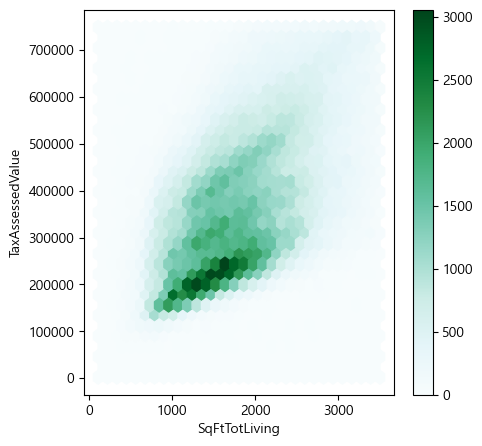

In [133]:
kc_tax = pd.read_csv(file_path+'kc_tax.csv.gz')
print(kc_tax.shape)
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & 
                     (kc_tax['SqFtTotLiving'] > 100) & 
                     (kc_tax['SqFtTotLiving'] < 3500)]
print(kc_tax0.shape)

ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y  = 'TaxAssessedValue',
                        gridsize = 30, sharex =False, figsize = (5,5))
plt.show()

In [ ]:
#등고선 graph
fig, ax = plt.subplots(figsize = (4,4))
sns.kdeplot(data = kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue', ax = ax)
plt.show()

## 분할표

In [8]:
#분할표 사용 - 범주형과 범주형 데이터의 분포 확인
lc_loans = pd.read_csv(file_path+'lc_loans.csv')
lc_loans.head()

#grade 별 status의 개수 확인
#margin - view programing에서 content - content 사이의 여백
#통계 분야 margin - 전체에 관련된 집계 데이터 의미
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status', aggfunc = lambda x: len(x), margins = True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [11]:
#grade의 비율을 표시하기 위한 교차 분할 표
#나누는 방향은 선택하면 됨
df = crosstab.copy().loc['A':'G'] #복제
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## 범주형 & 수치형 데이터 분포 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


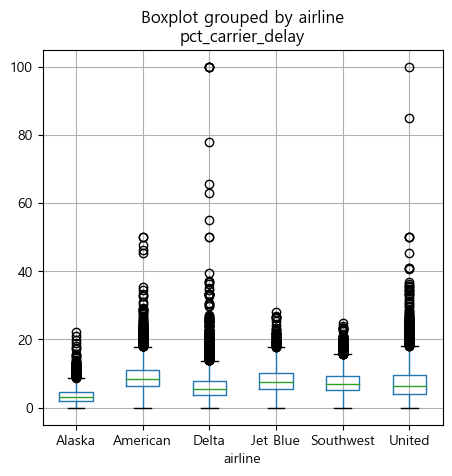

In [13]:
airline_stats = pd.read_csv(file_path+'airline_stats.csv')
airline_stats.info()

#값의 범위를 확인하기는 좋은데 분포를 파악하기는 어려움
ax = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay', figsize=(5,5))
plt.show()

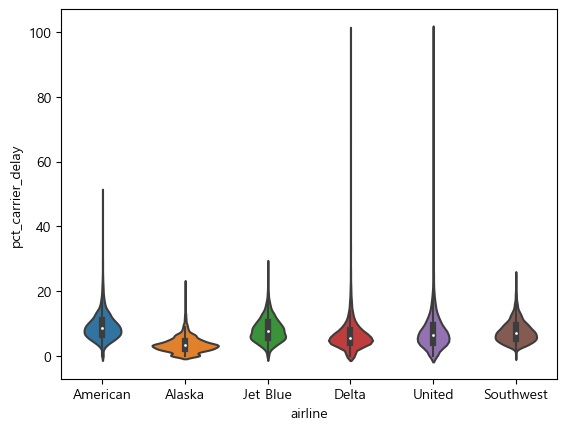

In [16]:
sns.violinplot(data = airline_stats,  x= 'airline', y = 'pct_carrier_delay')
plt.show()

# 확률

## bayesian model

In [ ]:
#시약 문제
#병에 걸릴 확률과 


In [ ]:
#진단 시약의 판단 여부를 대입해서 확률 모형을 생성
#정상 - 정상: 95%, 정상 - 오류: 5%
#병 양성 - 양성: 99%, 양성 - 음성: 1%
cpd_Y_on_X = TabularCPD('Y', 2, np.array([0.95,0.01], [0.05, 0.99]), evidence = ['X'], evidence_card = [2])
cpd_Y_on_X

#model 생성
from pgmpy.models import BayesianModel
model = BayesianModel(['X','Y'])
model.add_cpds(cpd_X, cpd_Y_on_X)
#모델이 정상적으로 만들어 졌는지 확인
model.check_model()

#양성으로 나왔을 때 확률
from pygmpy,inference import VariableElimination
inference = VariableElimination(model)
#Y = 1 -> 양성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
#Y = 0 -> 음성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
inference.query(['X'], evidence = {'Y':1})

## 정규 분포

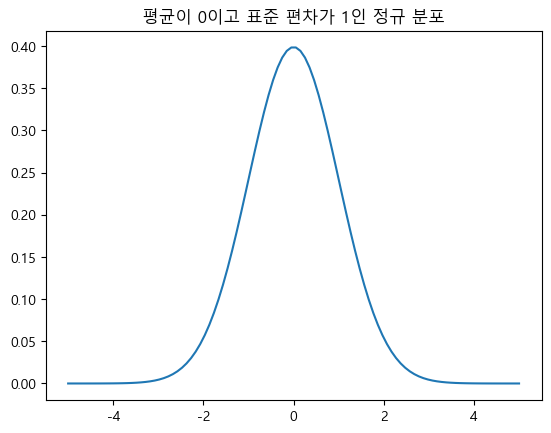

In [20]:
#정규 분포 만들기

#평균 & 표준 편차
mu = 0
std = 1
rv = sp.stats.norm(mu, std) #정규 분포 객체 생성
xx = np.linspace(-5,5,100) #sample data 100개 생성

plt.plot(xx, rv.pdf(xx))
plt.title('평균이 0이고 표준 편차가 1인 정규 분포')
plt.show()

In [21]:
#sampling
x = rv.rvs(100)
x

array([ 1.39606535,  1.57544871,  1.49519464,  1.04627236,  0.0058405 ,
        0.5763429 ,  1.33048   , -0.34710999,  0.4111587 ,  0.0573626 ,
       -0.1528636 ,  0.96301233, -1.80681723,  2.24800809,  0.37370077,
       -0.90309763,  1.43703015,  2.42350347, -0.52939383, -0.15781991,
        1.02034948,  0.69957649,  0.78472649,  0.31694475,  1.88932374,
       -0.43251204,  0.62909532, -1.7269392 , -0.27848753, -0.49959573,
        0.81506852, -0.25007574, -0.62870156,  0.17263131, -1.12934542,
       -1.40470757,  0.57638551,  1.57089925, -0.25456397,  0.62730584,
       -1.04158843, -0.98475214, -0.77341107, -1.24554771, -1.08968132,
        0.13412131,  0.65751178, -0.96528699,  0.37962879,  0.41761662,
       -0.32258405,  0.41093923, -0.57866574,  0.56971154, -0.02794275,
       -0.55040717, -1.84950346, -0.99062374, -0.72389575, -0.07920554,
       -0.48585435,  0.23333014,  0.51198484,  0.37464467,  0.14041062,
       -0.1879356 , -1.67472723,  1.7795084 , -0.5924814 , -0.70

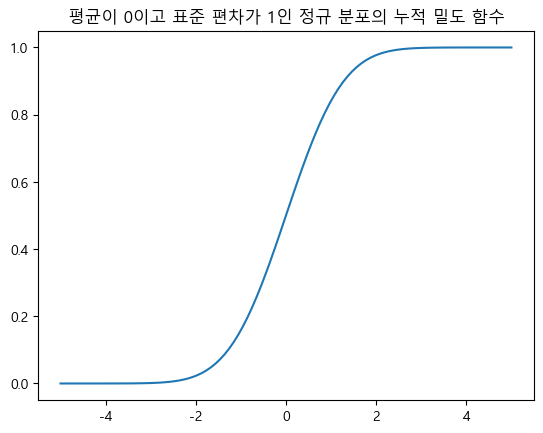

In [24]:
#누적 밀도 함수
plt.plot(xx, rv.cdf(xx))
plt.title('평균이 0이고 표준 편차가 1인 정규 분포의 누적 밀도 함수')
plt.show()

## 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2010-01-01 to 2023-07-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPASTT01USM661N  163 non-null    float64
 1   SPASTT01JPM661N  163 non-null    float64
 2   SPASTT01EZM661N  163 non-null    float64
 3   SPASTT01KRM661N  163 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


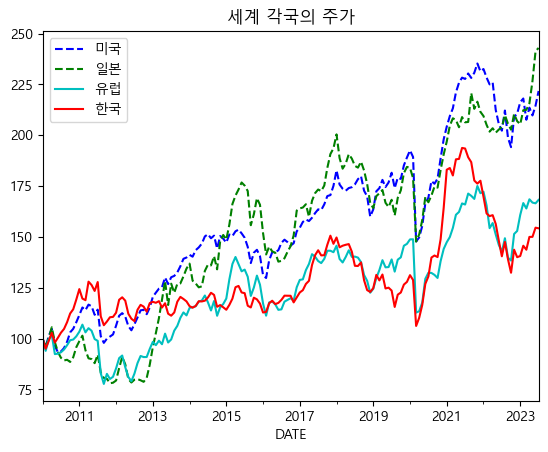

In [35]:
import pandas_datareader.data as web
import datetime

#날짜 설정
start = datetime.datetime(2023,1,1)
end = datetime.datetime(2023,8,22)

#가져올 국가의 주가 지수 코드
symbols = ['SPASTT01USM661N', 'SPASTT01JPM661N', 'SPASTT01EZM661N','SPASTT01KRM661N']

data = pd.DataFrame()

for symbol in symbols:
    data[symbol] = web.DataReader(symbol, data_source = 'fred',
                                 start = '2010-01-01', end = '2023-08-22')[symbol]

#data.head()
data.info()

data.columns = ['미국','일본','유럽','한국']
data = data/data.iloc[0]* 100
styles = ['b--','g--','c','r']
data.plot(style = styles)
plt.title('세계 각국의 주가')
plt.show()

In [36]:
# nas

In [37]:
# 일차별 차이

In [ ]:
#특정한 회사 주가 가져오기

# 검정

## 자유도

0.041656494140624965


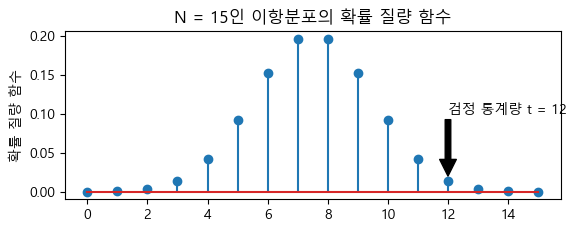

In [10]:
#시행 횟수
N = 15
#앞면이 나올 확률
mu = 0.5

#이항 분포 생성
rv = sp.stats.binom(N, mu)

xx = np.arange(N+1)
#확률 질량 함수(PMF = 각각이 나올 수 있는 확률에 대한 함수)를 출력
plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel('확률 질량 함수')
plt.title('N = 15인 이항분포의 확률 질량 함수')
plt.annotate('검정 통계량 t = 12', xy = (12, 0.02), xytext = (12, 0.1),
            arrowprops = {'facecolor':'black'})

print(rv.pmf(12-1))
plt.show()

0.982421875


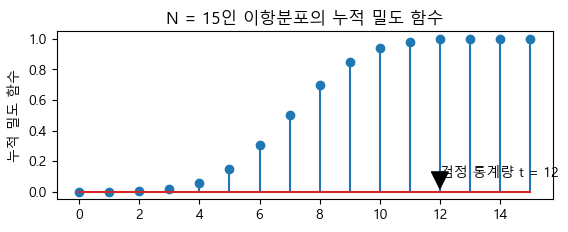

0.03515625


In [13]:
#시행 횟수
N = 15
#앞면이 나올 확률
mu = 0.5

#이항 분포 생성
rv = sp.stats.binom(N, mu)

xx = np.arange(N+1)
#누적 밀도 함수(CDF = 각각이 나올 수 있는 확률에 대한 함수)를 출력
plt.subplot(211)
plt.stem(xx, rv.cdf(xx))
plt.ylabel('누적 밀도 함수')
plt.title('N = 15인 이항분포의 누적 밀도 함수')
plt.annotate('검정 통계량 t = 12', xy = (12, 0.02), xytext = (12, 0.1),
            arrowprops = {'facecolor':'black'})

print(rv.cdf(12-1))
plt.show()

#유의 확률
x = 2* (1- rv.cdf(12-1))
print(x)

In [17]:
#tdata.csv 파일의 성적을 읽어서 평균이 75점이라고 할 수 있는지 유의 수준 5% 로 결정
items = pd.read_csv(file_path+'tdata.csv', encoding = 'cp949')

#성적의 평균이 75라고 했을 때의 유의 확률
result = sp.stats.ttest_1samp(items['성적'], popmean = 75).pvalue
result

if result >= 0.05:
    print('유의 확률이 유의 수준보다 크므로 귀무 가설 채택')
    print('평균은 75라고 할 수 있음')
else:
    print('유의 확률이 유의 수준보다 작으므로 귀무 가설 기각')
    print('평균은 75라고 할 수 없음')

유의 확률이 유의 수준보다 크므로 귀무 가설 채택
평균은 75라고 할 수 있음


In [ ]:
#첫 번째 데이터 집단
N_1 = 100
mu_1 = 0
sigma_1 = 1

#두 번째 데이터 집단
N_1 = 100
mu_2 = 0.5
sigma_2 = 1

#데이터 생성
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

✏️

In [ ]:
#서로 다른 10명에게 수면제 1을 복용했을 때 수면 증가 시간 과 수면제 2를 복용했을 때 수면 증가 시간을 조사한 경우 
#서로 다른 수면제를 복용한 경우 야그이 효과가 다른지 여부 판단 - 유의 수준 5%
#p-value가 0.05보다 크면 귀무 가설 채택 - 2개의 평균은 같다
#p-value가 0.05보다 작으면 귀무 가설 기각 - 2개의 평균은 다르다

x1 = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2 = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])

r = sp.stats.ttest_ind(x1, x2, equal_var = True)
print(r)

if r.pvalue >= 0.05:
    print('귀무 가설 채택: 2개의 평균은 같다')
else:
    print('귀무 가설 기각: 2개의 평균은 다르다')